In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#다음 분기에 어떤 게임을 설계해야 할까

In [35]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv').dropna()
df.reset_index(drop=True,inplace=True)

In [36]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


In [38]:
df.describe()

,Unnamed: 0,Year
count,16241.000000,16241.000000
mean,8291.719845,1994.178437
std,4792.062774,155.484265
min,1.000000,0.000000
25%,4143.000000,2003.000000
50%,8284.000000,2007.000000
75%,12441.000000,2010.000000
max,16598.000000,2020.000000


In [39]:
df.corr()

,Unnamed: 0,Year
Unnamed: 0,1.000000,0.001494
Year,0.001494,1.000000


#------------------------------------------------------------------------------------
#데이터 전처리

In [40]:
eu = []
for i in df['EU_Sales']:
  if 'K' in i:
    eu.append(i.replace('K',''))
  elif 'M' in i:
    eu.append(i.replace('M',''))
  else:
    eu.append(i)


In [41]:
na = []
for i in df['NA_Sales']:
  if 'K' in i:
    na.append(i.replace('K',''))
  elif 'M' in i:
    na.append(i.replace('M',''))
  else:
    na.append(i)

In [42]:
jp = []
for i in df['JP_Sales']:
  if 'K' in i:
    jp.append(i.replace('K',''))
  elif 'M' in i:
    jp.append(i.replace('M',''))
  else:
    jp.append(i)

In [43]:
other = []
for i in df['Other_Sales']:
  if 'K' in i:
    other.append(i.replace('K',''))
  elif 'M' in i:
    other.append(i.replace('M',''))
  else:
    other.append(i)

In [44]:
df['EU_Sales'] = pd.to_numeric(eu)
df['JP_Sales'] = pd.to_numeric(jp)
df['NA_Sales'] = pd.to_numeric(na)
df['Other_Sales'] = pd.to_numeric(other)

df['Sales'] = df['EU_Sales'] + df['JP_Sales'] + df['NA_Sales'] + df['Other_Sales']

In [45]:
year = []
for i in df['Year']:
  if 0<=i<=9:
    year.append(float('200'+str(i)))
  elif 10<=i<=20:
    year.append(float('20'+str(i)))
  elif 80<=i<=99:
    year.append(float('19'+str(i)))
  else:
    year.append(i)

In [46]:
df['Year'] = list(map(int, year))

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  int64  
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  float64
 7   EU_Sales     16241 non-null  float64
 8   JP_Sales     16241 non-null  float64
 9   Other_Sales  16241 non-null  float64
 10  Sales        16241 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


#------------------------------------------------------------------------------------
#지역에 따라서 선호하는 게임 장르가 다를까

In [48]:
data = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [49]:
d = data.groupby('Genre').agg(sum)
d

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,7881.72,4729.42,1325.43,1093.08
Adventure,371.52,203.52,111.81,96.62
Fighting,1029.54,1488.51,266.96,176.01
Misc,4150.97,2346.01,333.95,202.51
Platform,3752.07,1489.34,340.32,391.11
Puzzle,191.51,100.42,56.24,12.44
Racing,5839.21,864.39,316.06,416.17
Role-Playing,1527.55,213.06,4169.10,786.00
Shooter,3221.83,3646.89,78.14,441.52


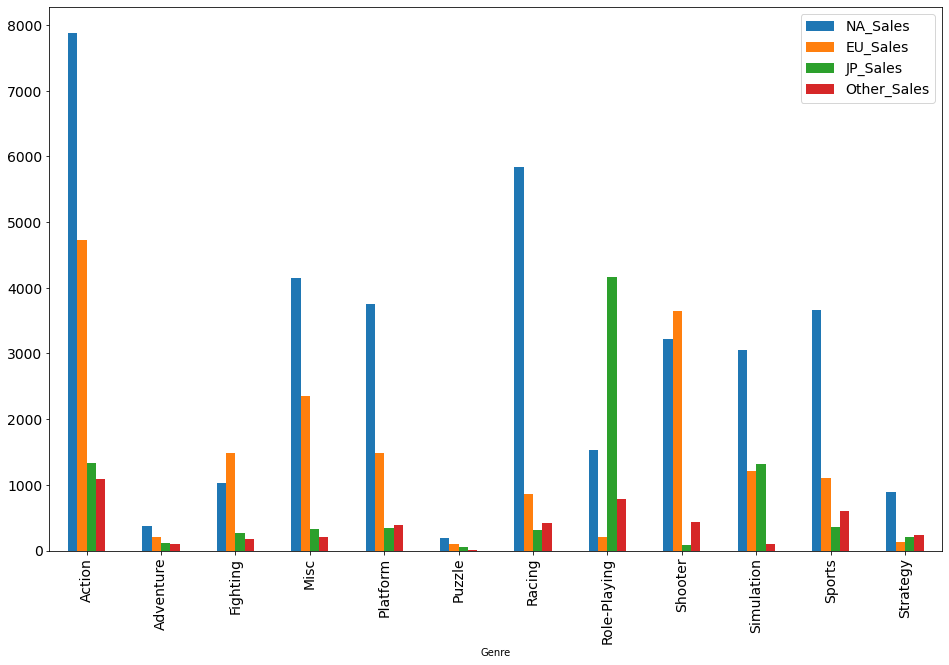

In [50]:
d.plot(kind='bar',stacked=False,figsize=(16,10),fontsize=14)
plt.legend(fontsize=14)

-------------------------------------------------------------- \
북아메리카 : Action, Racing \
\
유럽 : Action, Shooter \
\
일본 : Role-Playing, Action, Simulation \
\
기타 : Action, Role-Playing \
-------------------------------------------------------------- \

In [51]:
p=df[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [52]:
p

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2008,0.04,0.00,0.00,0.00
1,2009,0.17,0.00,0.00,0.01
2,2010,0.00,0.00,0.02,0.00
3,2010,0.04,0.00,0.00,0.00
4,2010,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16236,2006,0.15,0.04,0.00,0.01
16237,2005,0.01,0.00,0.00,0.00
16238,2015,0.44,0.19,0.03,0.13
16239,2013,0.05,0.05,0.25,0.03


In [53]:
scaler = StandardScaler()
x = scaler.fit_transform(p)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [54]:
finalDf = pd.concat([principalDf, df['Genre']], axis = 1)
finalDf

,PC1,PC2,Genre
0,-0.127124,-0.165175,Action
1,-0.228965,-0.237633,Action
2,-0.327341,-0.314493,Adventure
3,-0.327892,-0.314350,Misc
4,-0.332184,-0.311334,Platform
...,...,...,...
16236,0.071952,-0.014280,Platform
16237,0.174184,0.058238,Action
16238,-0.843108,-0.674924,Sports
16239,-0.627577,-0.532346,Action


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

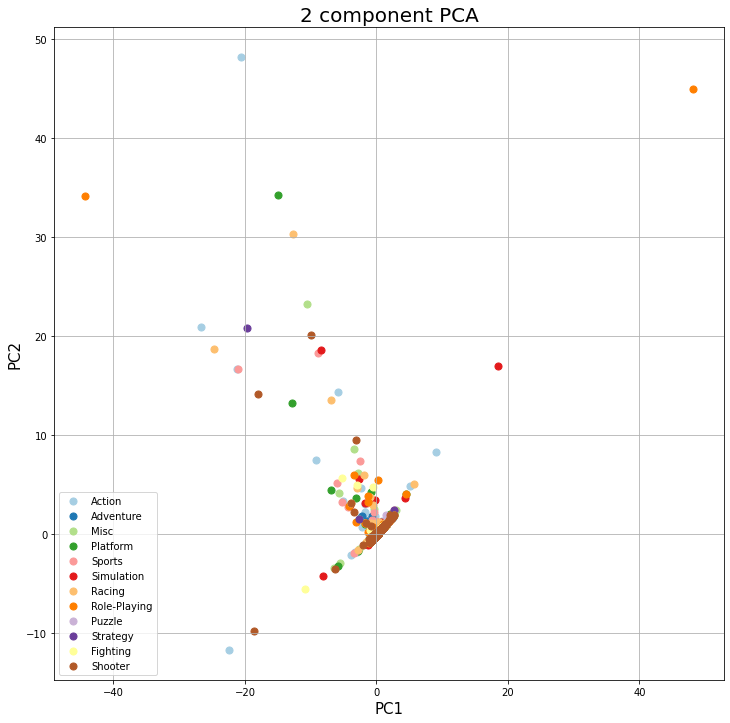

In [81]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df['Genre'].unique()
colors = sns.color_palette("Paired", 12)
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Genre'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

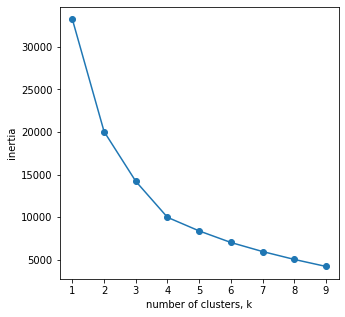

In [56]:
# 적절한 군집수 찾기 
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10) 
inertias = [] 
for k in ks: 
  model = KMeans(n_clusters=k) 
  model.fit(principalDf) 
  inertias.append(model.inertia_) 
# Plot ks vs inertias 
plt.figure(figsize=(5, 5)) 
plt.plot(ks, inertias, '-o') 
plt.xlabel('number of clusters, k') 
plt.ylabel('inertia') 
plt.xticks(ks) 
plt.show()


In [59]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(principalDf)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
principalDf['cluster'] = model.fit_predict(principalDf)


In [60]:
principalDf

,PC1,PC2,cluster
0,-0.127124,-0.165175,1
1,-0.228965,-0.237633,1
2,-0.327341,-0.314493,1
3,-0.327892,-0.314350,1
4,-0.332184,-0.311334,1
...,...,...,...
16236,0.071952,-0.014280,1
16237,0.174184,0.058238,1
16238,-0.843108,-0.674924,1
16239,-0.627577,-0.532346,1


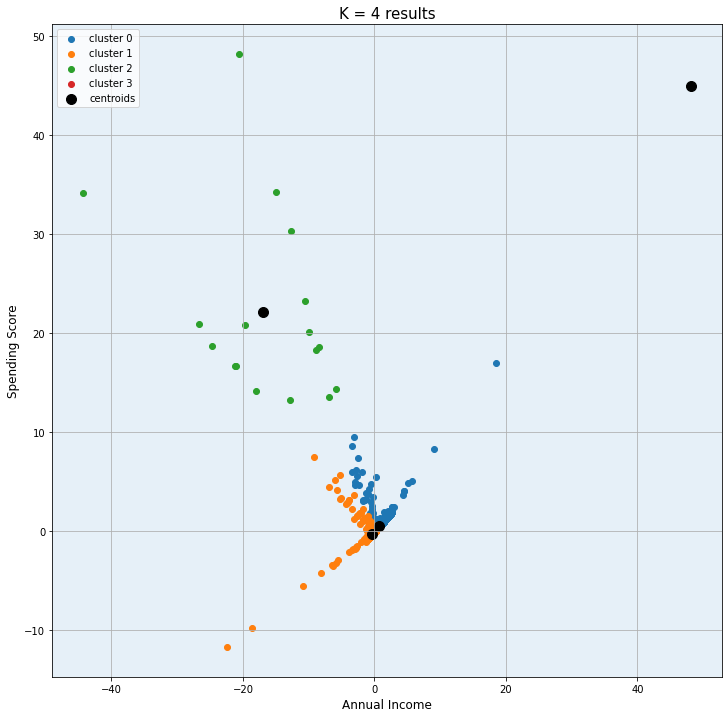

In [62]:

plt.figure(figsize = (12, 12))

for i in range(k):
    plt.scatter(principalDf.loc[principalDf['cluster'] == i, 'PC1'], principalDf.loc[principalDf['cluster'] == i, 'PC2'], 
                label = 'cluster ' + str(i))
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=100, marker='o',
    c='black', edgecolor='black',
    label='centroids'
)
plt.legend()
plt.gca().set_facecolor('#E6F0F8')
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.grid()
plt.show()

#------------------------------------------------------------------------------------
#연도별 게임의 트렌드가 있을까

In [63]:
trend = df[['Year','Genre','Sales']]
year = sorted(trend['Year'].unique())
year_list = []

for i in year:
  d_t = trend.loc[trend['Year']==i]
  d_t = d_t[['Genre','Sales']]
  d_t = d_t.groupby(d_t['Genre']).sum()
  #d_t.reset_index(drop=True,inplace=True)
  year_list.append(d_t)

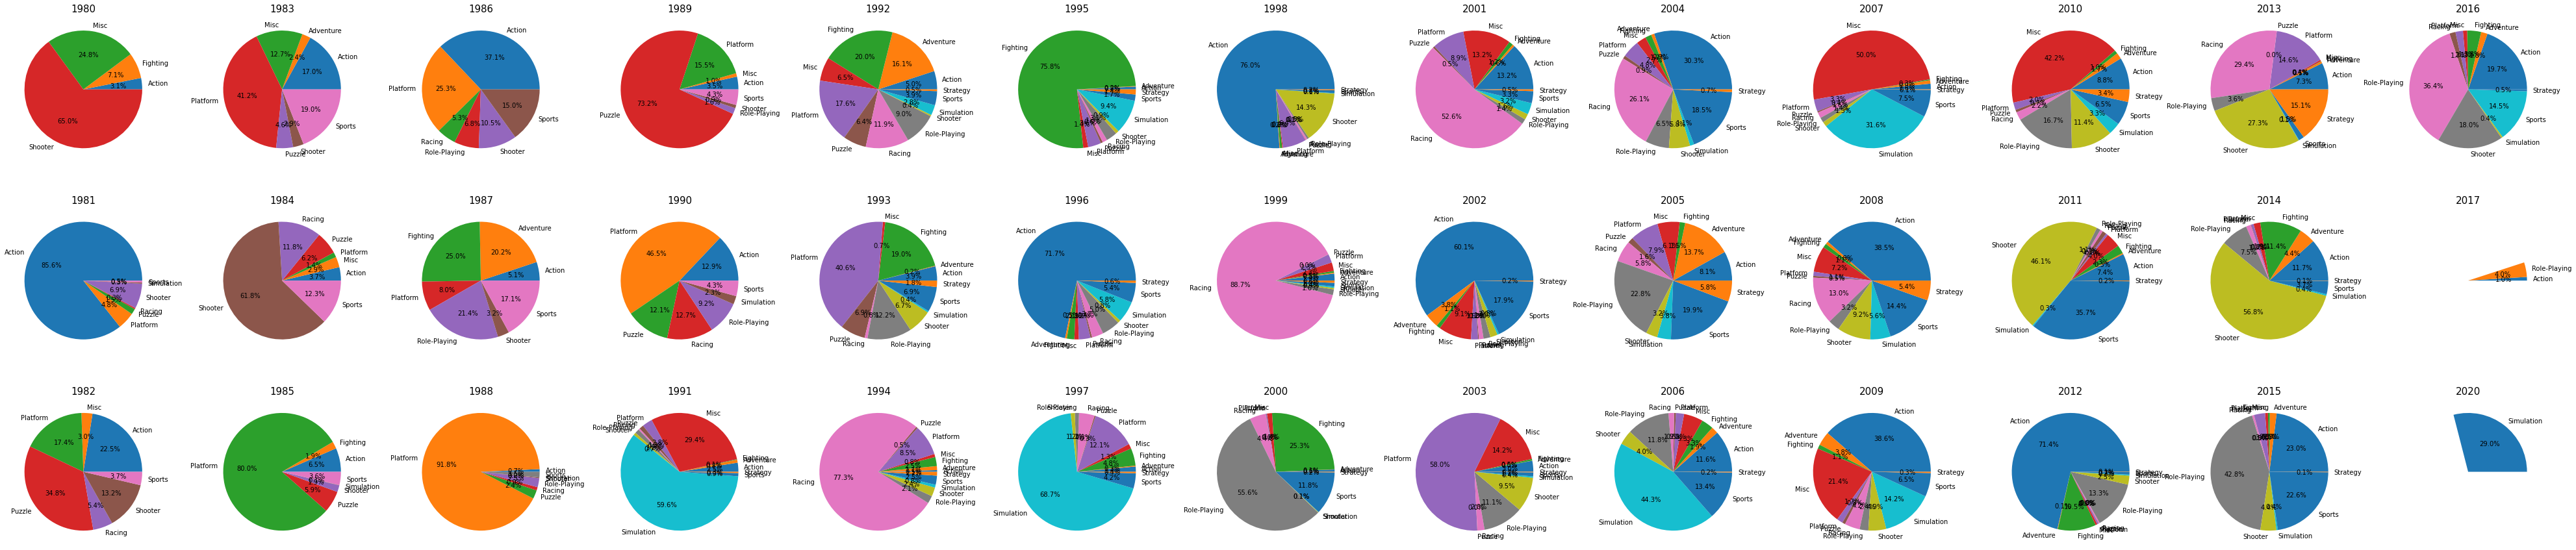

In [64]:
f, axes = plt.subplots(3, 13)
f.set_size_inches((70, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
n=0
for k in range(0,13):
  for i in range(0,3):
      axes[i][k].set_title(str(year[n]),size=15)
      axes[i][k].pie(year_list[n]['Sales'],labels = year_list[n].index,autopct = '%.1f%%')
      n+=1
plt.show()

#------------------------------------------------------------------------------------
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [65]:
s = df[['Platform','Genre','Sales']]

In [66]:
s = s.sort_values(by=["Sales"], ascending=[False]) 
s

,Platform,Genre,Sales
1930,N64,Action,4103.50
9640,GBA,Platform,2932.28
3517,PS,Role-Playing,2782.53
13635,PS,Racing,2572.22
1601,PS3,Action,2563.94
...,...,...,...
7301,PSP,Action,0.01
7318,PS3,Role-Playing,0.01
7333,DS,Adventure,0.01
13935,GBA,Shooter,0.01


In [77]:
top_game = s[:1600]
top_game['Platform'].value_counts()

PS2     260
X360    185
PS3     181
PS      146
Wii     127
DS      120
PS4      61
PC       55
GBA      51
NES      51
PSP      46
N64      43
3DS      42
GB       41
GC       40
SNES     38
XOne     31
XB       30
WiiU     13
2600     13
PSV      12
GEN      10
DC        2
SAT       1
SCD       1
Name: Platform, dtype: int64

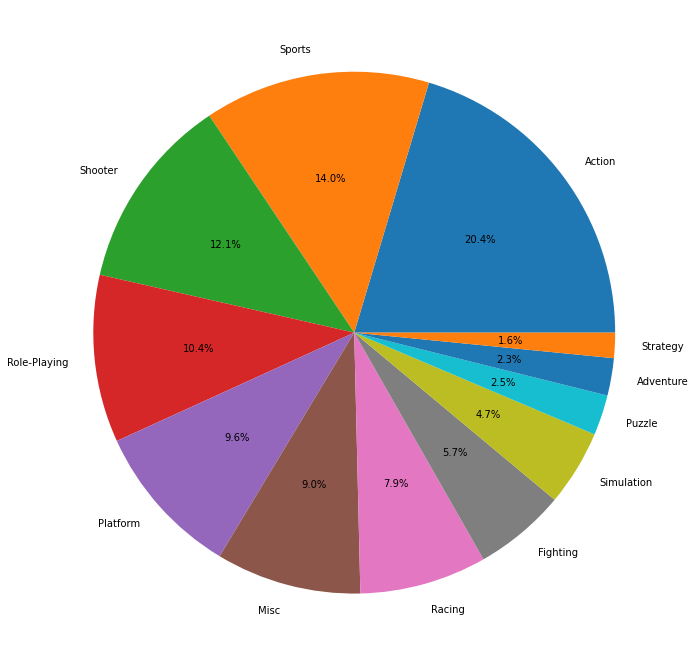

In [80]:
plt.figure(figsize = (12, 12))
plt.pie(top_game['Genre'].value_counts(),labels = top_game['Genre'].value_counts().index ,autopct = '%.1f%%')
plt.show()

----------------------------------------------------------------
#다음 분기에 어떤 게임을 설계해야 할까?
----------------------------------------------------------------

In [88]:
recent = df[(df['Year']==2010) | (df['Year']==2011) | (df['Year']==2012) | (df['Year']==2013) | (df['Year']==2014) | (df['Year']==2015) | (df['Year']==2016)]

In [91]:
recent = recent[['Platform','Year','Genre','Sales']]
recent

,Platform,Year,Genre,Sales
2,PSP,2010,Adventure,0.02
3,DS,2010,Misc,0.04
4,PS3,2010,Platform,0.25
6,PC,2011,Simulation,0.03
9,PS3,2011,Action,0.08
...,...,...,...,...
16225,XOne,2014,Action,0.27
16231,PS3,2011,Shooter,0.18
16233,PS3,2010,Adventure,0.05
16238,PS3,2015,Sports,0.79


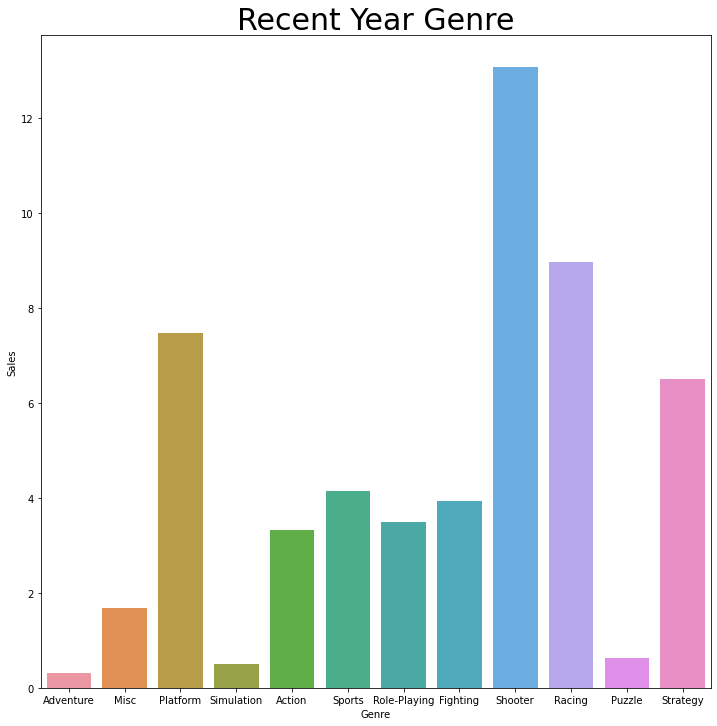

In [154]:
plt.figure(figsize = (12, 12))
recent_genre = recent[['Genre','Sales']]
sns.barplot(data = recent_genre, x = 'Genre',y = 'Sales',ci=None)
plt.title('Recent Year Genre',size=30)
plt.show()

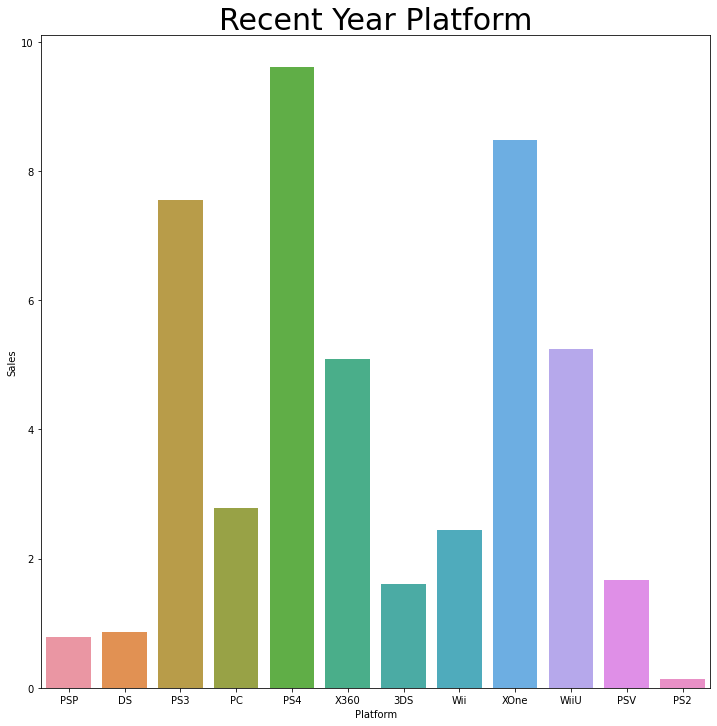

In [155]:
plt.figure(figsize = (12, 12))
recent_genre = recent[['Platform','Sales']]
sns.barplot(data = recent_genre, x = 'Platform',y = 'Sales',ci=None)
plt.title('Recent Year Platform',size=30)
plt.show()

In [175]:
recent_top = recent[(recent['Platform']=='PS4')|(recent['Platform']=='PS3')|(recent['Platform']=='XOne')]
recent_top = recent_top[['Year','Genre']]
recent_top = recent_top.groupby('Genre').count().reset_index()
recent_top

,Genre,Year
0,Action,463
1,Adventure,91
2,Fighting,80
3,Misc,101
4,Platform,37
5,Puzzle,2
6,Racing,85
7,Role-Playing,152
8,Shooter,164
9,Simulation,28


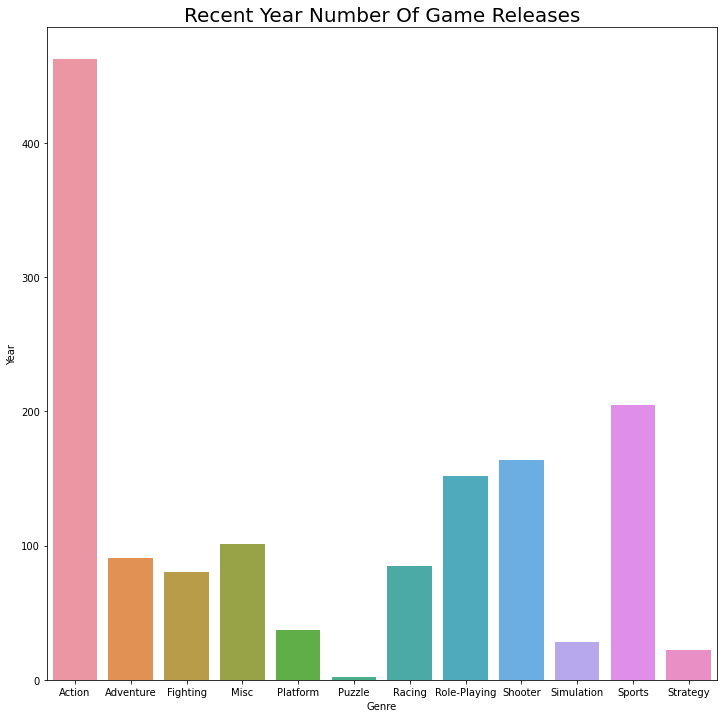

In [176]:
plt.figure(figsize = (12, 12))
sns.barplot(data = recent_top, x = 'Genre',y = 'Year',ci=None)
plt.title('Recent Year Number Of Game Releases',size=20)
plt.show()

In [170]:
recent_ = recent[(recent['Genre']=='Shooter')|(recent['Genre']=='Racing')|(recent['Genre']=='Platform')]
recent_ = recent_[['Platform','Genre']]
recent_ = recent_.groupby('Platform').count().reset_index()
recent_


,Platform,Genre
0,3DS,44
1,DS,36
2,PC,108
3,PS2,3
4,PS3,168
5,PS4,62
6,PSP,11
7,PSV,26
8,Wii,64
9,WiiU,29


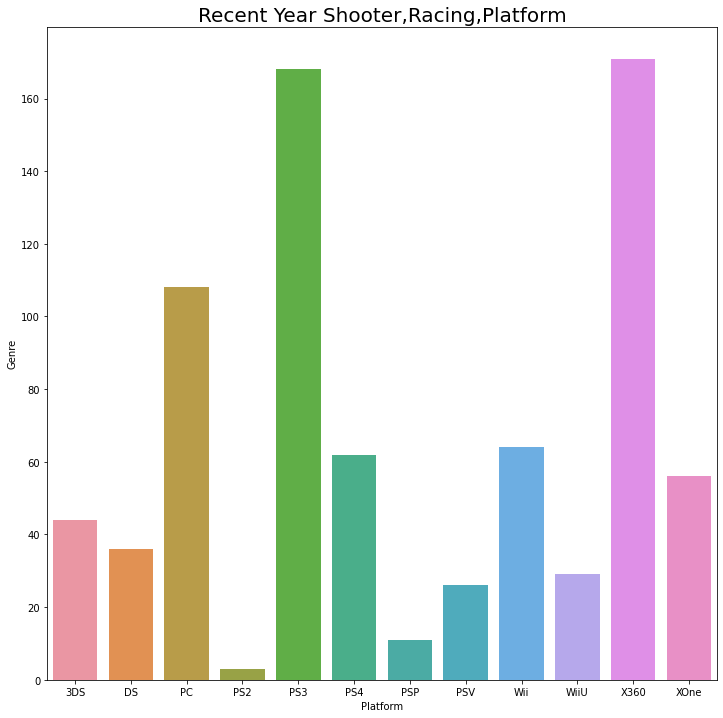

In [172]:
plt.figure(figsize = (12, 12))
sns.barplot(data = recent_, x = 'Platform',y = 'Genre',ci=None)
plt.title('Recent Year Shooter,Racing,Platform',size=20)
plt.show()

#분석 결과
최근에 PlayStation과 Xbox에서 출시하는 게임의 수가 다른 플랫폼에 비해 매우 많으며, 그 중 Action장르에 게임을 많이 출시합니다. 하지만 각각의 게임의 출고량은 그렇게 높지 않다는 것을 알수있습니다. \

반면 최근 출고량이 많은 슈팅,레이싱,플랫폼 게임의 경우 동일하게 PlayStation,Xbox회사에서 출시가 되었지만, Action장르와는 다르게 출고량이 많다는 것을 알수있습니다. \

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- \

요약하자면, 출시하는 게임 수에 비해 출고량이 적은 Action장르보다 출시량 대비 출고량이 뛰어난 슈팅,레이싱,플랫폼 게임을 출시하면 좋은 결과가 있을걸로 보입니다.